In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings

In [10]:
print(dir(warnings))

['WarningMessage', '_OptionError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_add_filter', '_defaultaction', '_filters_mutated', '_formatwarning_orig', '_formatwarnmsg', '_formatwarnmsg_impl', '_getaction', '_getcategory', '_is_internal_frame', '_next_external_frame', '_onceregistry', '_processoptions', '_setoption', '_showwarning_orig', '_showwarnmsg', '_showwarnmsg_impl', '_warn_unawaited_coroutine', 'catch_warnings', 'defaultaction', 'filters', 'filterwarnings', 'formatwarning', 'onceregistry', 'resetwarnings', 'showwarning', 'simplefilter', 'sys', 'warn', 'warn_explicit']


In [11]:
warnings.WarningMessage = False

In [13]:
data = pd.read_csv("C://Users/Simran Grover/Desktop/h1b.csv",index_col=0)

In [14]:
data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


#### 1. How mant soc_names are full time position

In [15]:
data['SOC_NAME'].value_counts()

Computer Systems Analysts                           291170
Computer Programmers                                226574
SOFTWARE DEVELOPERS, APPLICATIONS                   221783
COMPUTER SYSTEMS ANALYSTS                           215353
Software Developers, Applications                   192933
                                                     ...  
ELECTRICAL ENGINEERINGS                                  1
OPERATIONS SYSTEMS ANALYST                               1
IT PROJECT MANAGERS                                      1
SECURITIES,COMMODITIES,FINANCIAL SVS SALES AGENT         1
SALES REPS, WHOLESALE & MANUFACTURING, TECHNICAL         1
Name: SOC_NAME, Length: 2132, dtype: int64

In [18]:
data[data['FULL_TIME_POSITION'] == "Y"]['SOC_NAME'].nunique()

1942

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [20]:
data.describe()

,PREVAILING_WAGE,YEAR,lon,lat
count,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [24]:
plt.rcParams['figure.figsize'] = 11,5
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = "red"

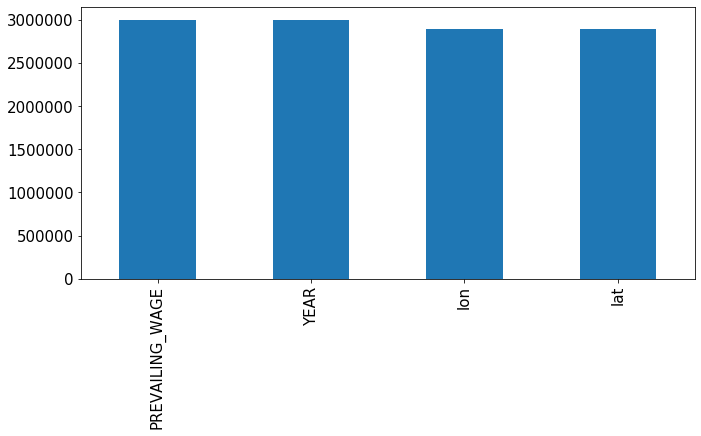

In [25]:
data.describe().loc["count"].plot(kind="bar")

In [27]:
from get_color import getcolor

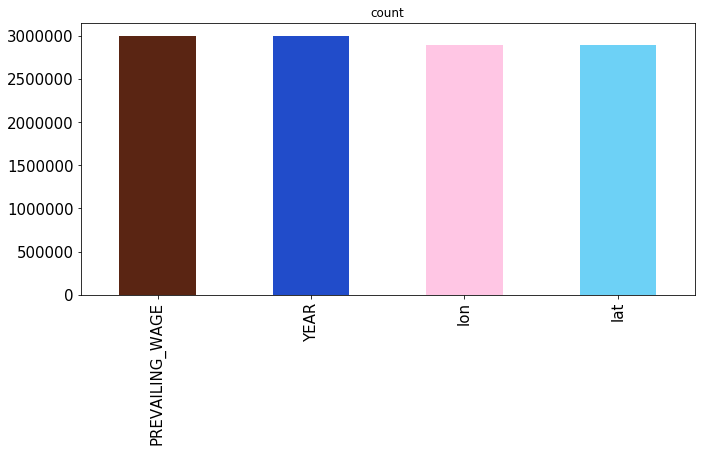

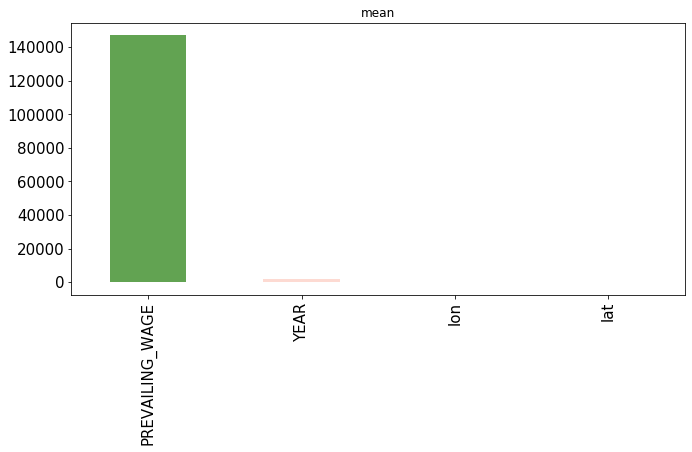

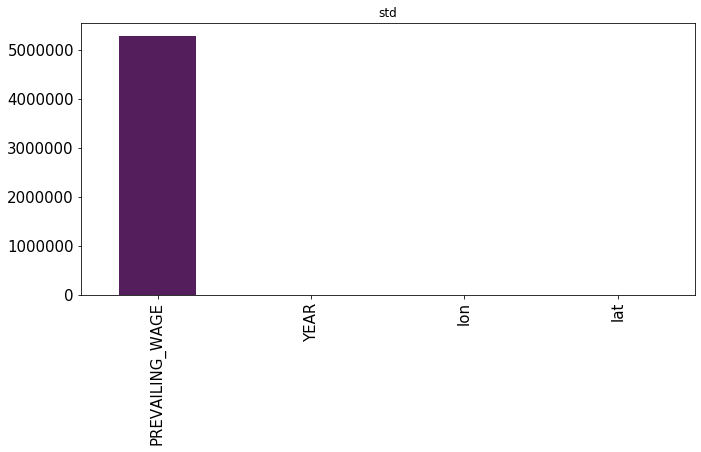

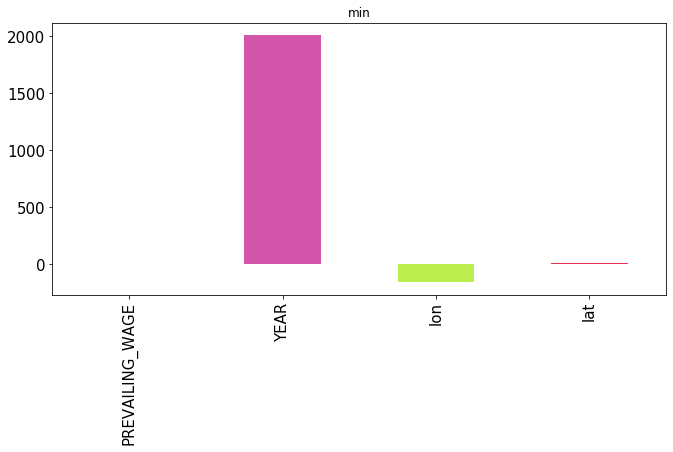

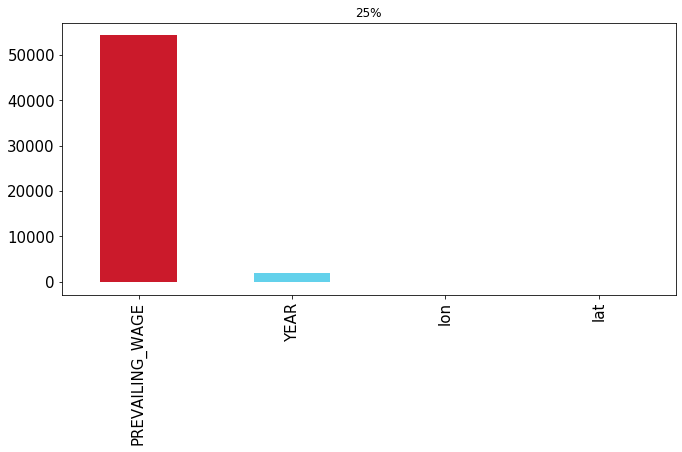

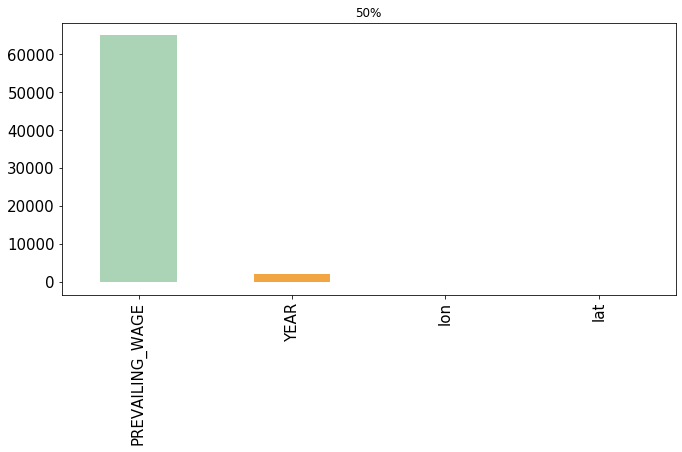

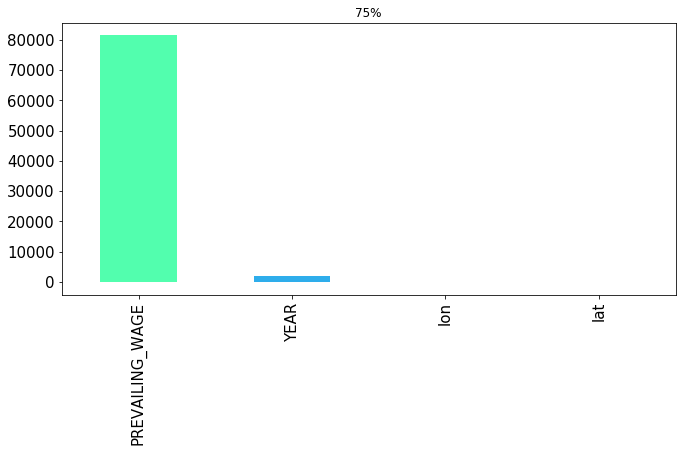

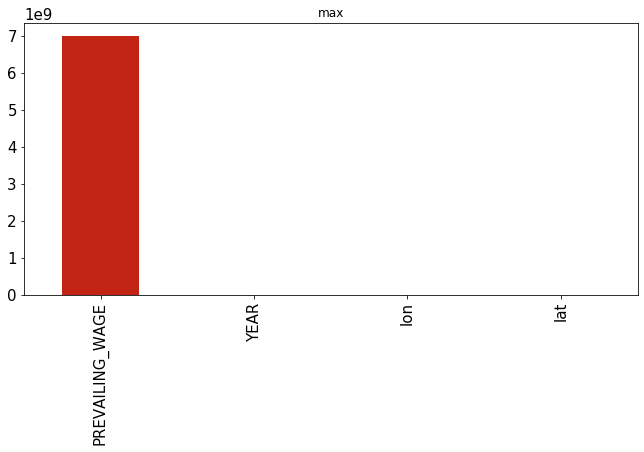

In [30]:
for i in data.describe().index:
    data.describe().loc[i].plot(kind="bar",color=[getcolor() for _ in range(4)],title=i)
    plt.show()

#### 2. Top 10 states is having more petitions

In [35]:
df = data.copy()

In [37]:
df['State'] = df['WORKSITE'].apply(lambda x : x.split(",")[1])

In [38]:
df['City'] = df['WORKSITE'].apply(lambda x : x.split(",")[0])

In [39]:
df['State'].head()

1       MICHIGAN
2          TEXAS
3     NEW JERSEY
4       COLORADO
5       MISSOURI
Name: State, dtype: object

In [40]:
df['City'].head()

1      ANN ARBOR
2          PLANO
3    JERSEY CITY
4         DENVER
5      ST. LOUIS
Name: City, dtype: object

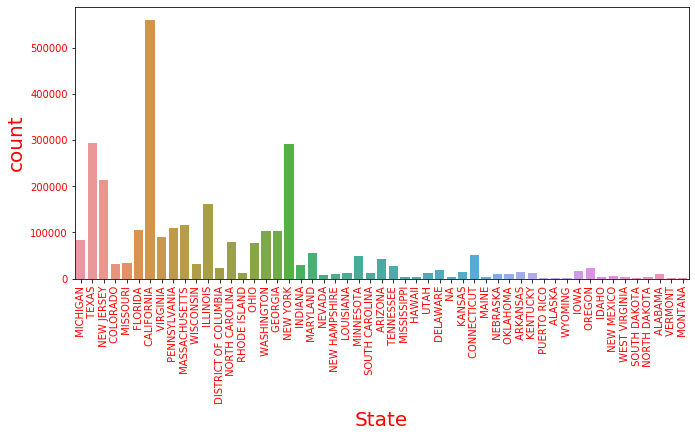

In [46]:
sns.countplot(df['State'])
plt.xticks(rotation=90,color="red",fontsize=10)
plt.yticks(fontsize=10,color="red")
plt.show()

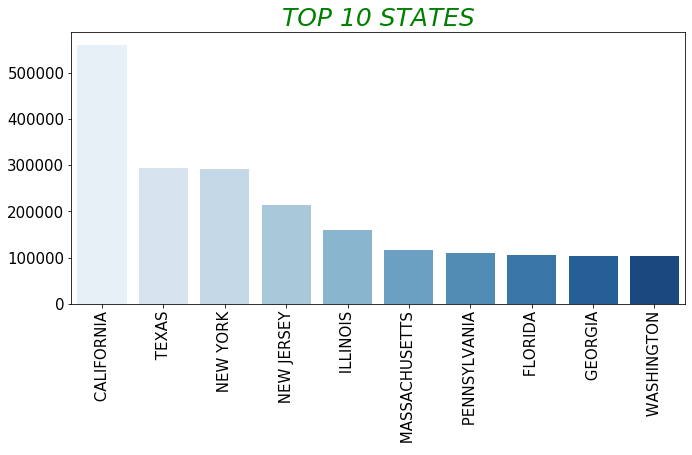

In [53]:
index = df['State'].value_counts()[:10].index
values = df['State'].value_counts()[:10].values
sns.barplot(index,values,palette="Blues")
plt.tick_params(axis="x",rotation=90)
plt.title("TOP 10 STATES",fontdict={"fontsize":25,"color":"green","fontstyle":"italic"})
plt.show()

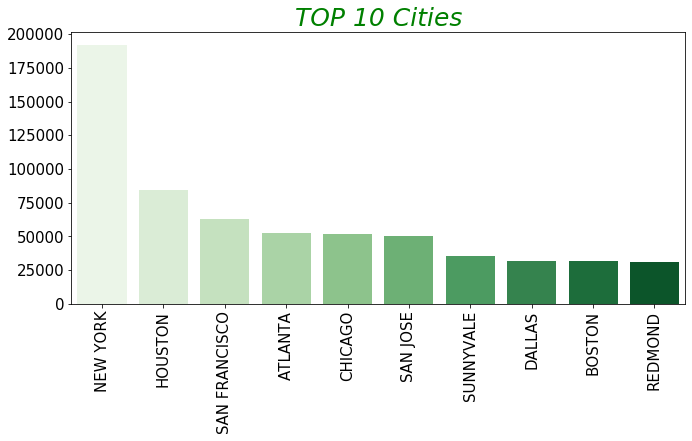

In [54]:
index = df['City'].value_counts()[:10].index
values = df['City'].value_counts()[:10].values
sns.barplot(index,values,palette="Greens")
plt.tick_params(axis="x",rotation=90)
plt.title("TOP 10 Cities",fontdict={"fontsize":25,"color":"green","fontstyle":"italic"})
plt.show()

#### 3. Top 10 Job titles

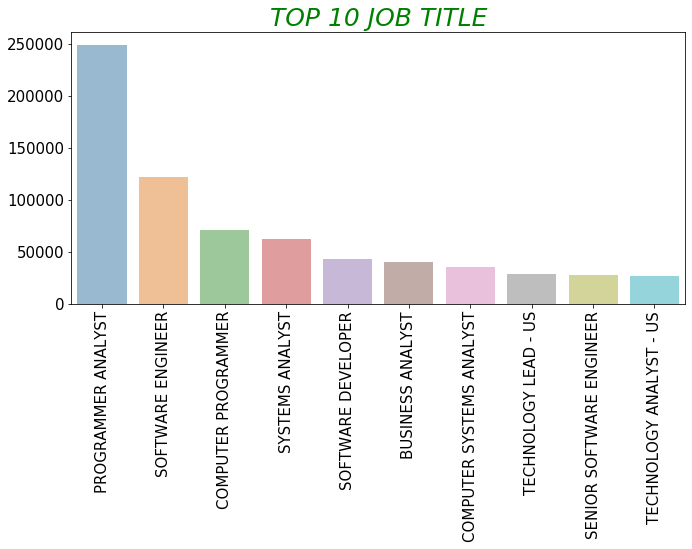

In [55]:
index = df['JOB_TITLE'].value_counts()[:10].index
values = df['JOB_TITLE'].value_counts()[:10].values
sns.barplot(index,values,alpha=0.5)
plt.tick_params(axis="x",rotation=90)
plt.title("TOP 10 JOB TITLE",fontdict={"fontsize":25,"color":"green","fontstyle":"italic"})
plt.show()

#### 4. Top 10 job titles per year

In [56]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,State,City
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,MICHIGAN,ANN ARBOR
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,TEXAS,PLANO
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,NEW JERSEY,JERSEY CITY
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,COLORADO,DENVER
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,MISSOURI,ST. LOUIS


In [59]:
df.groupby("YEAR")['JOB_TITLE'].value_counts()

YEAR    JOB_TITLE                           
2011.0  PROGRAMMER ANALYST                      31799
        SOFTWARE ENGINEER                       12763
        COMPUTER PROGRAMMER                      8998
        SYSTEMS ANALYST                          8644
        BUSINESS ANALYST                         3891
                                                ...  
2016.0   BUSINESS INTELLIGENCE ANALYST              1
         PROJECT MANAGERS                           1
         QA ANALYST                                 1
         SHAREPOINT/SQL DEVELOPER                   1
         SR. BUSINESS INTELLIGENCE DEVELOPER        1
Name: JOB_TITLE, Length: 444733, dtype: int64

In [60]:
d = df.groupby("YEAR")['JOB_TITLE'].value_counts()

In [61]:
type(d)

pandas.core.series.Series

In [65]:
d.index[:10]

MultiIndex([(2011.0,       'PROGRAMMER ANALYST'),
            (2011.0,        'SOFTWARE ENGINEER'),
            (2011.0,      'COMPUTER PROGRAMMER'),
            (2011.0,          'SYSTEMS ANALYST'),
            (2011.0,         'BUSINESS ANALYST'),
            (2011.0, 'COMPUTER SYSTEMS ANALYST'),
            (2011.0,      'ASSISTANT PROFESSOR'),
            (2011.0,       'PHYSICAL THERAPIST'),
            (2011.0, 'SENIOR SOFTWARE ENGINEER'),
            (2011.0,        'SENIOR CONSULTANT')],
           names=['YEAR', 'JOB_TITLE'])

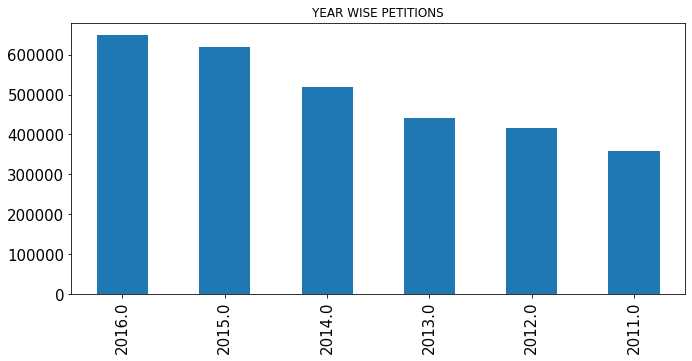

In [68]:
df['YEAR'].value_counts().plot(kind="bar",title="YEAR WISE PETITIONS")

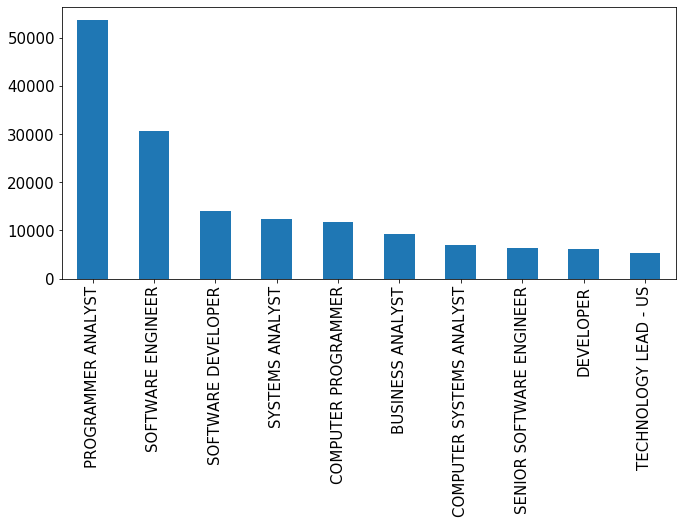

In [74]:
year = df['YEAR'].value_counts().index
df[df['YEAR'] == year[0]]['JOB_TITLE'].value_counts()[:10].plot(kind="bar")

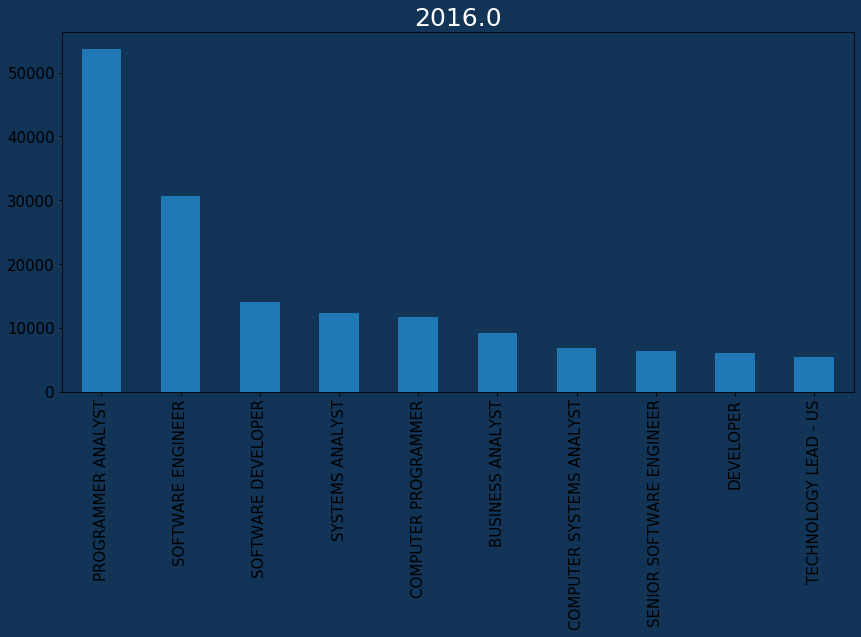

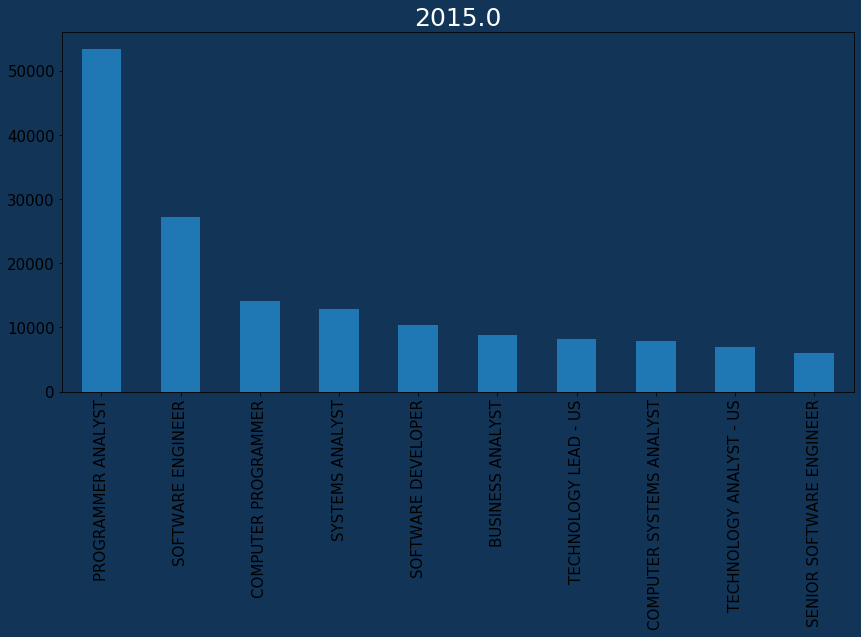

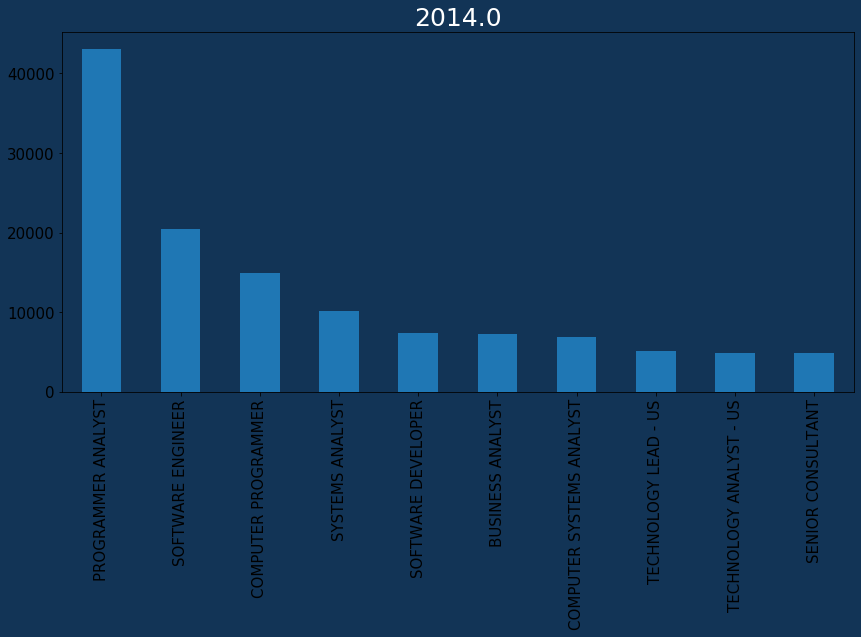

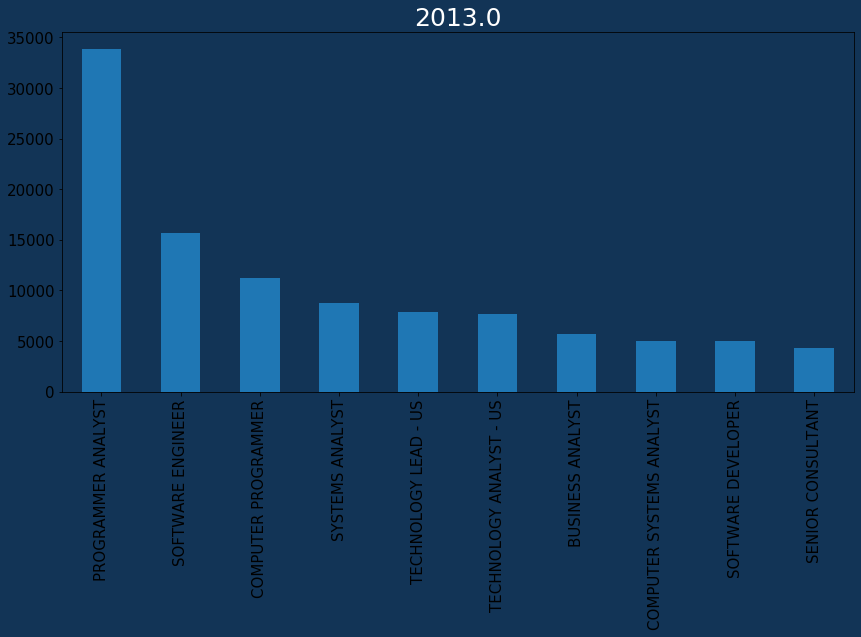

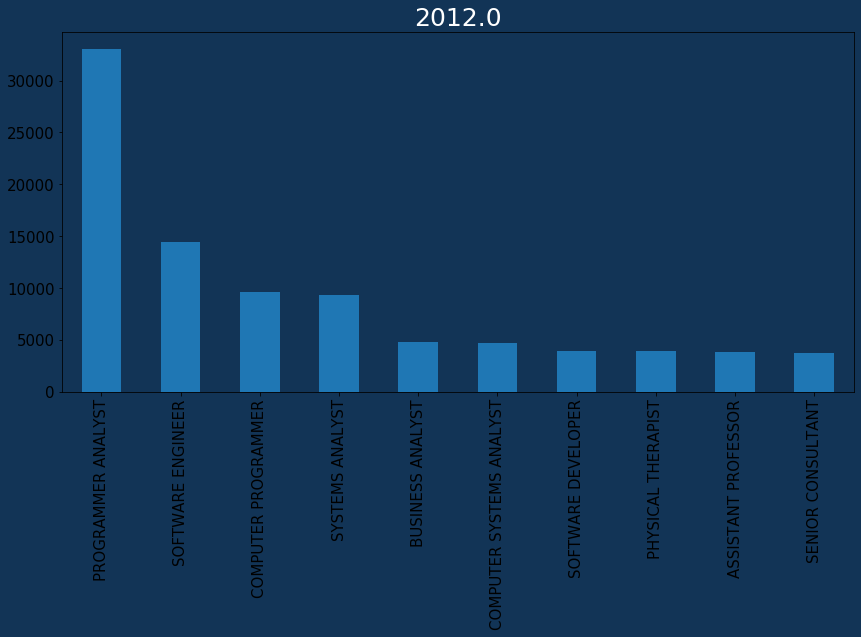

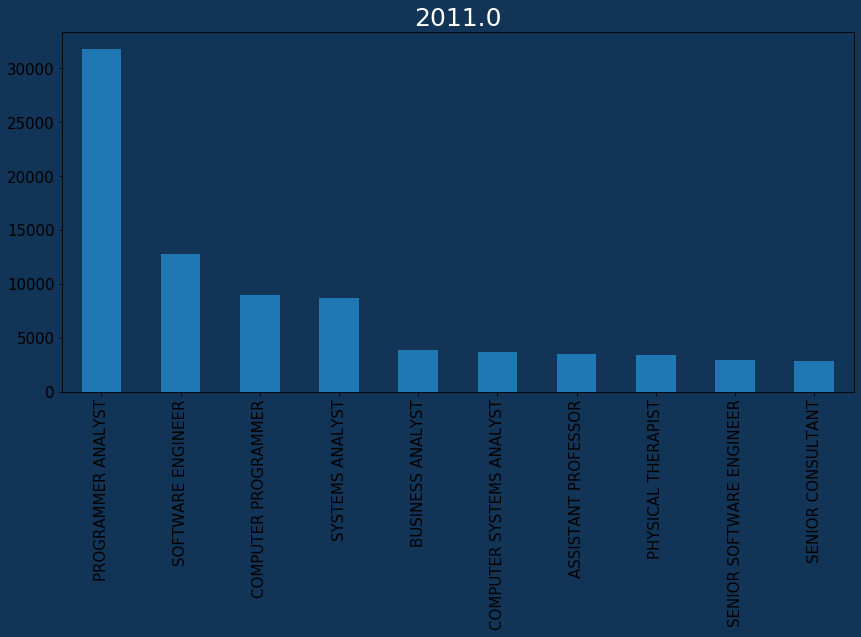

In [78]:
year = df['YEAR'].value_counts().index
for i in year:
    fig = plt.figure(facecolor="#123456")
    ax = fig.add_axes([0,0,1,1],facecolor="#123456")
    df[df['YEAR'] == i]['JOB_TITLE'].value_counts()[:10].plot(kind="bar",ax=ax)
    ax.tick_params(labelcolor="black")
    ax.set_title(i,fontdict={"fontsize":25,"color":"white"})
    plt.show()

#### 5. TOP 20 companies

In [81]:
values = df['EMPLOYER_NAME'].value_counts()[:20].values
index = df['EMPLOYER_NAME'].value_counts()[:20].index

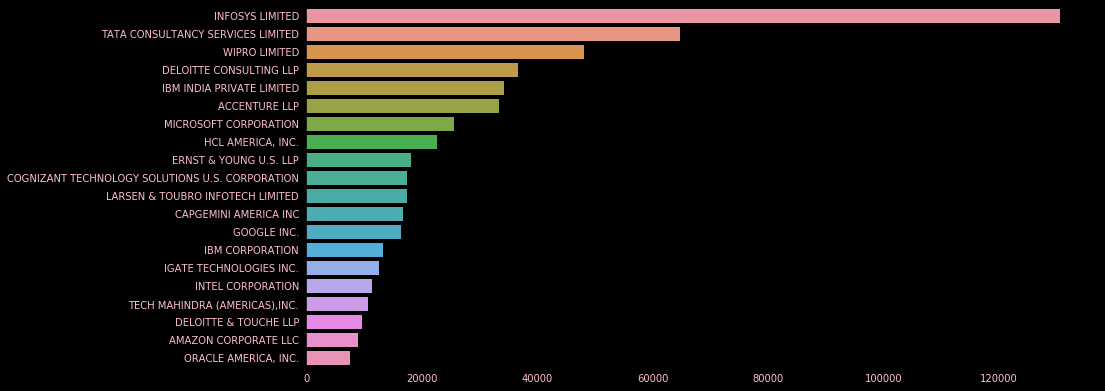

In [85]:
fig = plt.figure(facecolor="black")
ax = fig.add_axes([0,0,1,1],facecolor="black")
sns.barplot(values,index)
ax.tick_params(labelcolor="pink",labelsize=10)
plt.show()

#### 6. Last 20 Companies

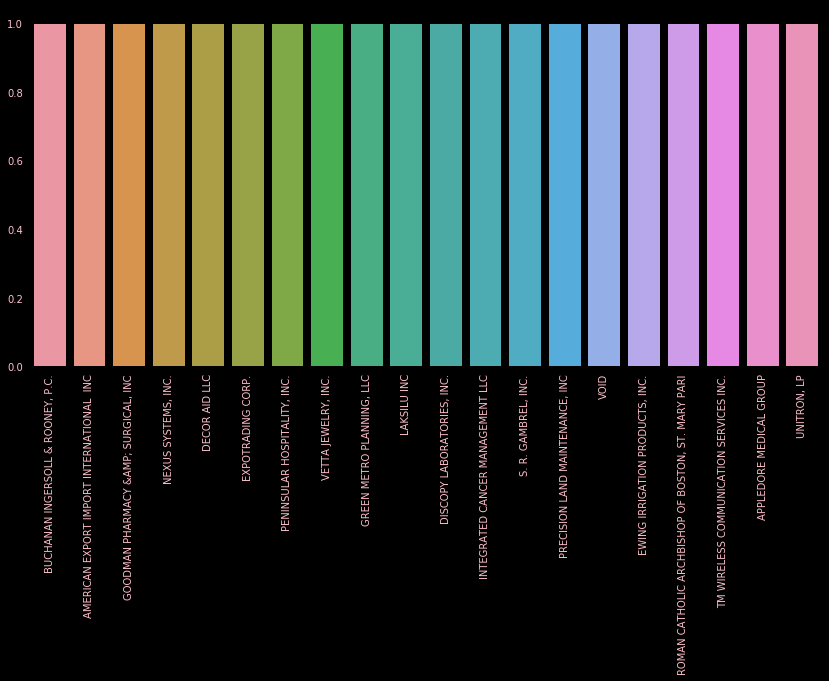

In [91]:
values = df['EMPLOYER_NAME'].value_counts()[-1:-21:-1].values
index = df['EMPLOYER_NAME'].value_counts()[-1:-21:-1].index
fig = plt.figure(facecolor="black")
ax = fig.add_axes([0,0,1,1],facecolor="black")
sns.barplot(index,values)
ax.tick_params(labelcolor="pink",labelsize=10)
plt.xticks(rotation=90)
plt.show()

In [86]:
values = df['EMPLOYER_NAME'].value_counts()[-20::1].values

In [87]:
values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [88]:
values = df['EMPLOYER_NAME'].value_counts()[-1:-21:-1].values

In [89]:
values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### 7. % of full time position and part time position

In [93]:
(data['FULL_TIME_POSITION'].value_counts() / len(data))*100

Y    85.800068
N    14.199433
Name: FULL_TIME_POSITION, dtype: float64

#### 8. how many chief excecutive case status is not widrawn statewise

In [99]:
df[(df['SOC_NAME'] == "CHIEF EXECUTIVES") & (df['CASE_STATUS'] == "WITHDRAWN")]["State"].value_counts()

 ILLINOIS                9
 CALIFORNIA              9
 FLORIDA                 6
 DISTRICT OF COLUMBIA    4
 NA                      4
 NEW JERSEY              3
 NEW YORK                3
 MICHIGAN                2
 NEVADA                  2
 MASSACHUSETTS           2
 TENNESSEE               2
 GEORGIA                 2
 OHIO                    2
 TEXAS                   2
 SOUTH CAROLINA          1
 VIRGINIA                1
 WASHINGTON              1
 NORTH CAROLINA          1
 IOWA                    1
 MINNESOTA               1
 MARYLAND                1
 MISSOURI                1
 NEW HAMPSHIRE           1
Name: State, dtype: int64

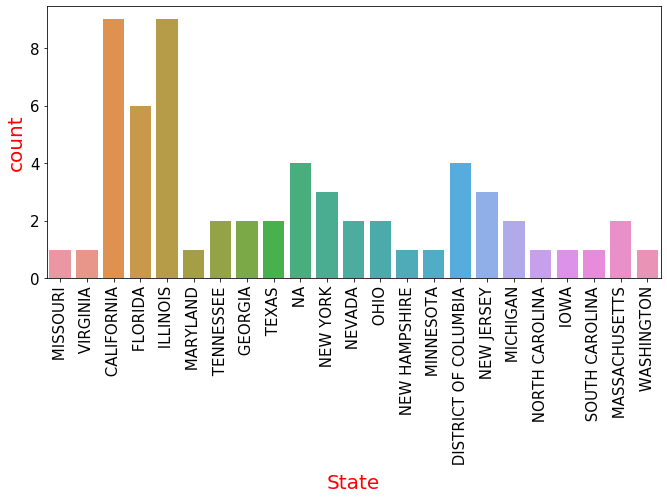

In [101]:
sns.countplot(df[(df['SOC_NAME'] == "CHIEF EXECUTIVES") & (df['CASE_STATUS'] == "WITHDRAWN")]["State"])
plt.tick_params(axis="x",rotation=90)

In [96]:
df[df['SOC_NAME'] == "CHIEF EXECUTIVE"]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,State,City


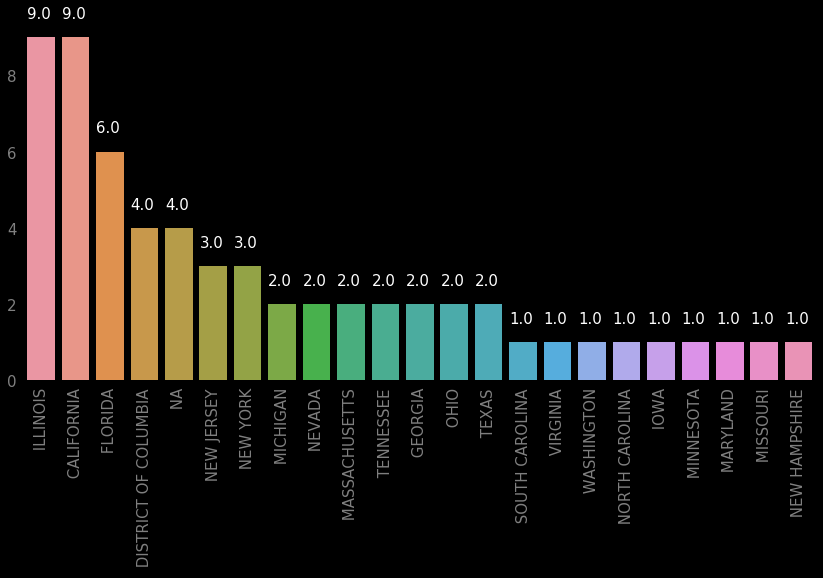

In [122]:
values = df[(df['SOC_NAME'] == "CHIEF EXECUTIVES") & (df['CASE_STATUS'] == "WITHDRAWN")]["State"].value_counts().values
index = df[(df['SOC_NAME'] == "CHIEF EXECUTIVES") & (df['CASE_STATUS'] == "WITHDRAWN")]["State"].value_counts().index
fig = plt.figure(facecolor="black")
ax = fig.add_axes([0,0,1,1],facecolor="black")
sns.barplot(index,values,ax=ax)
ax.tick_params(axis="x",rotation=90,labelcolor="gray")
ax.tick_params(axis="y",labelcolor="gray")
for sp in ["left","top","bottom","right"]:
    ax.spines[sp].set_visible(False)
for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    plt.text(x,h+0.5,h,fontsize=15,color="white")
plt.show()

In [109]:
ax.patches

In [112]:
ax.patches[0].get_xy()

(-0.4, 0)

In [113]:
ax.patches[0].get_y()

0

In [114]:
ax.patches[0].get_x()

-0.4

In [115]:
ax.patches[0].get_height()

9.0

### 9. Top 10 job title having most wages

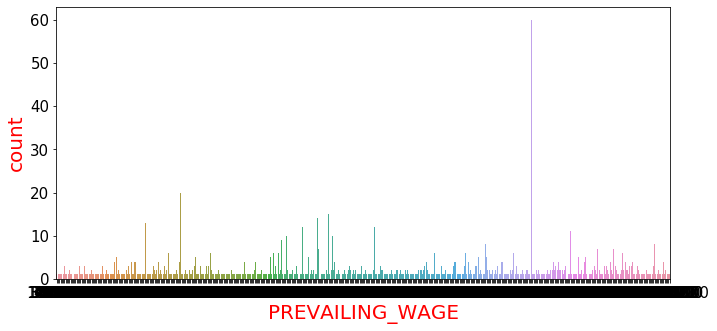

In [123]:
sns.countplot(df['PREVAILING_WAGE'][:1000])

In [131]:
i = df['PREVAILING_WAGE'].value_counts().head(10).index

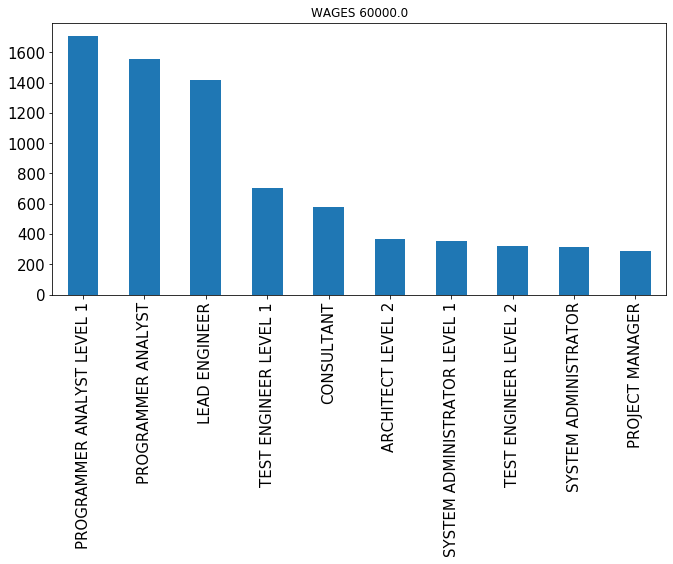

In [137]:
df[df['PREVAILING_WAGE'] == i[0]]['JOB_TITLE'].value_counts()[:10].plot(kind="bar",title=f"WAGES {i[0]}")

In [138]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

#### 10. Per Year Denied Cases

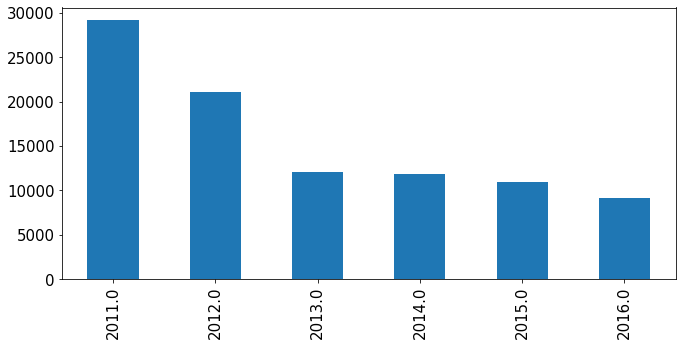

In [141]:
df[df['CASE_STATUS'] == "DENIED"]['YEAR'].value_counts().plot(kind="bar")

In [145]:
df[df['CASE_STATUS'] == "DENIED"].groupby("YEAR")['CASE_STATUS'].count()

YEAR
2011.0    29130
2012.0    21096
2013.0    12126
2014.0    11896
2015.0    10923
2016.0     9175
Name: CASE_STATUS, dtype: int64